In [41]:
import requests
import urllib
import json
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [42]:
# 인증키
key = "db5c00dc1fce45c49049bff225a0fea6"

# 도로 유형(ex: 고속도로 / its: 국도)
Type = "its"

# CCTV 유형(1: 실시간 스트리밍 / 2: 동영상 파일 3: 정지 영상)
cctvType = "1"

# 최소 경도 영역
minX = float(120.95)

# 최대 경도 영역
maxX = float(127.02)

# 최소 위도 영역
minY = float(30.55)

# 최대 위도 영역
maxY = float(37.60)

# 출력 결과 형식
getType = "json"

In [43]:
# TEST1
# url_cctv = f'https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type=ex&cctvType=1&minX=126.756&maxX=126.7936&minY=37.48135&maxY=37.5843&getType=json'

# TEST2
url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type={Type}&cctvType={cctvType}&minX={minX}&maxX={maxX}&minY={minY}&maxY={maxY}&getType={getType}"

In [45]:
response = urllib.request.urlopen(url_cctv)

In [46]:
json_str = response.read().decode("utf-8")

In [47]:
json_object = json.loads(json_str)

In [48]:
cctv_play = pd.json_normalize(json_object["response"]["data"], sep=',')

In [49]:
# 길이 ... 제한 해제
pd.set_option("display.max_rows", None)  # 모든 행 출력
pd.set_option("display.max_colwidth", None)  # 긴 문자열도 잘리지 않게 설정

In [50]:
# CCTV 링크 확인
print(cctv_play["cctvurl"])

0        http://cctvsec.ktict.co.kr/4107/YVJDetuWhH2gGuhzsUBWwJke83GSfQnSZrSa+3kEJS1xmMFFwFW5ohwHwyezBDSnbiZ5ZLw+iwdEtFlyF/ia/mt78zPuU2kP+nYYGHTgf1c=
1        http://cctvsec.ktict.co.kr/4108/uEw2V7VUiudn1PsEoqH2s6DPNMx0CC1Hcz8nG8xHkDCJtZLWOiA4CZsmLDQeRbsGlC5UQBl7NZyVWjnHm3asI6hNPbtIyT3h3xvNKDhWd8M=
2        http://cctvsec.ktict.co.kr/4109/XIgVIAd5Mc+EOXn7+RNsFgyiUJSAA609pgX3G4KT80Um0XiI+KRzZVVPLLnr3eWHWVDrK98vY7nHJdD/sYncLi4DFZxl9sbKH5e1NgWqBjU=
3        http://cctvsec.ktict.co.kr/4120/bUjLufPLscQPC/m5ncdHsZYrmBQ6Jo82qltJi1bP1hmmFxTm9wS9EwgNZ+2B7+PIvINkoxwcULlXtrYO8+trwvE8gpWFQUyxj8sTU9MSkfc=
4        http://cctvsec.ktict.co.kr/4122/WBJX/BxcJa+D8xev6cl9BKZuDkSktqgHtDkkVWWr0vUAy+KU4DNYS7SRVhatzLcK1FQClkaSpWVhc6ZcoPpoHvDdMtdie9csOzGaFhAwLyQ=
5        http://cctvsec.ktict.co.kr/4123/mRjzuG2QEXNol3zpf+raX4p56Gt1VB18r9zbMgfqRup/B1/VtjthJ7t7P9MhCCik48nETIQwj3P2UYiA4Ih4jHmQb12aTIv3ivi6EQIWNwc=
6        http://cctvsec.ktict.co.kr/4131/XC9kX72oYhNJsOqOiUb9WIYDsBPaEwrOpF2k1fDpdSluZ4ZX0f7QgNxpvkf

In [51]:
# CCTV 설치명 확인
print(cctv_play["cctvname"])

0                          [국도 21호선] 보령 봉황터널시점
1                          [국도 21호선] 보령 봉황터널종점
2                          [국도 21호선] 홍성 단아래사거리
3                           [국도 29호선] 서산 석림사거리
4                           [국도 29호선] 홍성 갈산교차로
5                           [국도 29호선] 서산 해미교차로
6                           [국도 32호선] 당진 감골교차로
7                           [국도 32호선] 서산 애향삼거리
8                           [국도 32호선] 서산 운산교차로
9                         [국도 34호선] 아산 인주공단교차로
10                            [국도 34호선] 아산 검문소
11                          [국도 34호선] 당진 운정교차로
12                          [국도 38호선] 평택 안중오거리
13                          [국도 38호선] 평택 안중사거리
14                        [국도77호선] 평택 서평택IC사거리
15                          [국도 38호선] 평택 내기삼거리
16                          [국도 38호선] 평택 현화교차로
17                            [국도 38호선] 당진 송악읍
18                           [국도39호선] 화성 송라저수지
19                          [국도 39호선] 화성 숙곡교차로
20                          [국도 39호선] 화성 쌍학교차로
21           

In [59]:
test_url = cctv_play["cctvurl"][0]

In [60]:
cap = cv2.VideoCapture(test_url)

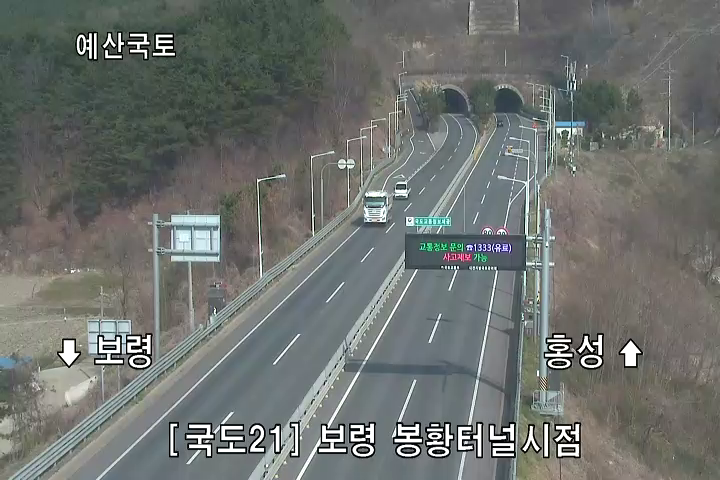

In [61]:
ret, frame = cap.read()
if ret:
    cv2_imshow(frame)  # 첫 프레임 출력
else:
    print("프레임을 가져올 수 없습니다.")

cap.release()

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

# CCTV URL 리스트
test_url_list = cctv_play["cctvurl"]

# 최대 100개 프레임 수집
max_images = 100
frames = []
success_indices = []

for idx, url in tqdm(enumerate(test_url_list), total=max_images):
    if idx >= max_images:
        break

    cap = cv2.VideoCapture(url)
    if not cap.isOpened():
        print(f"[{idx}] ❌ Can't open: {url}")
        continue

    ret, frame = cap.read()
    cap.release()

    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # OpenCV → RGB
        frames.append(frame)
        success_indices.append(idx)
    else:
        print(f"[{idx}] ⚠️ No frame from: {url}")

# 그리드로 출력
cols = 5
rows = (len(frames) + cols - 1) // cols
plt.figure(figsize=(20, rows * 3))

for i, frame in enumerate(frames):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(frame)
    plt.title(f"Video_URL_Num_Is {success_indices[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

 10%|█         | 10/100 [00:32<05:20,  3.56s/it]